In [1]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/test'

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/train/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/train/Car')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/test/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/test/Car')))

1696
1565
305
435


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2609 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
82/82 [==============================] - 961s 12s/step - loss: 0.3380 - accuracy: 0.8528 - val_loss: 0.2379 - val_accuracy: 0.9080
Epoch 2/30
82/82 [==============================] - 441s 5s/step - loss: 0.1435 - accuracy: 0.9417 - val_loss: 0.3582 - val_accuracy: 0.8727
Epoch 3/30
82/82 [==============================] - 448s 5s/step - loss: 0.0893 - accuracy: 0.9670 - val_loss: 0.2202 - val_accuracy: 0.9187
Epoch 4/30
82/82 [==============================] - 455s 6s/step - loss: 0.0773 - accuracy: 0.9728 - val_loss: 0.2890 - val_accuracy: 0.9049
Epoch 5/30
82/82 [==============================] - 440s 5s/step - loss: 0.0249 - accuracy: 0.9916 - val_loss: 0.3135 - val_accuracy: 0.9172
Epoch 6/30
82/82 [==============================] - 458s 6s/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.3904 - val_accuracy: 0.9126
Epoch 7/30
82/82 [==============================] - 439s 5s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4184 - val_accuracy: 0.9218
Epoch 8/30
8

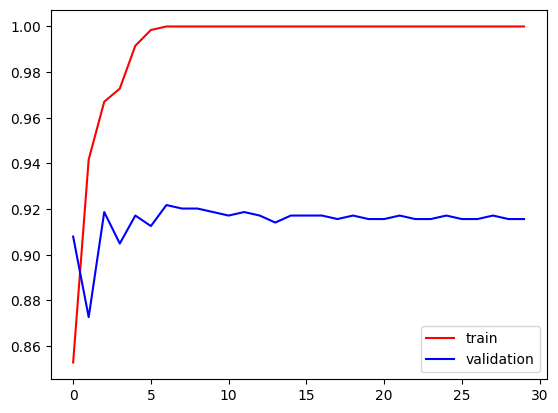

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

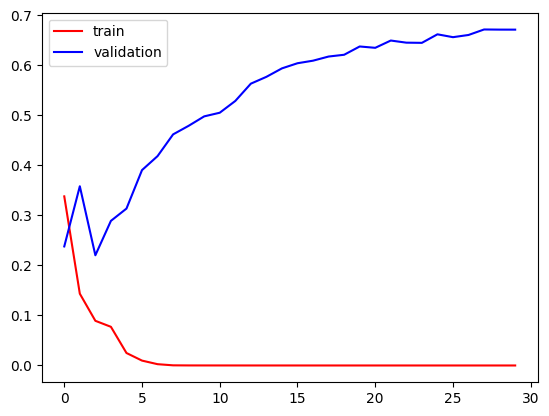

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 740 images belonging to 2 classes.


In [14]:
predictions = model.predict(test_data)
print(predictions)

24/24 [==============================] - 155s 7s/step
[[4.35436815e-01]
 [2.06939295e-01]
 [9.99999881e-01]
 [1.07120403e-14]
 [9.99766886e-01]
 [1.00000000e+00]
 [2.05502042e-18]
 [9.99999642e-01]
 [2.28140470e-06]
 [5.64014772e-04]
 [7.94273913e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99797881e-01]
 [9.99999523e-01]
 [1.00000000e+00]
 [8.78678560e-01]
 [1.00000000e+00]
 [6.34359102e-14]
 [1.26523782e-05]
 [9.99999940e-01]
 [1.91689123e-20]
 [9.97505128e-01]
 [8.91653396e-13]
 [2.20839205e-08]
 [9.99999762e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.98240054e-01]
 [1.00000000e+00]
 [7.94861085e-13]
 [1.00000000e+00]
 [6.08614414e-07]
 [9.99210238e-01]
 [1.11883190e-02]
 [7.78169140e-10]
 [1.00000000e+00]
 [9.64480673e-09]
 [2.72985420e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.15099332e-20]
 [9.99977291e-01]
 [1.15806060e-13]
 [9.98103976e-01]
 [1.00000000e+00]
 [1.01160192e-16]
 [5.37348247e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.58168671e-18]
 [5.146403

In [15]:
len(predictions)

740

In [16]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[125 180]
 [181 254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       305
           1       0.59      0.58      0.58       435

    accuracy                           0.51       740
   macro avg       0.50      0.50      0.50       740
weighted avg       0.51      0.51      0.51       740



In [17]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 3s 0us/step


In [18]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [19]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [21]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
82/82 [==============================] - 955s 12s/step - loss: 0.2945 - accuracy: 0.8712 - val_loss: 0.3290 - val_accuracy: 0.8650
Epoch 2/3
82/82 [==============================] - 930s 11s/step - loss: 0.2783 - accuracy: 0.8846 - val_loss: 0.2780 - val_accuracy: 0.8773
Epoch 3/3
82/82 [==============================] - 925s 11s/step - loss: 0.3049 - accuracy: 0.8708 - val_loss: 0.4639 - val_accuracy: 0.8221


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/train/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/train/Car')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/test/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Colab Notebooks/test/Car')))

1696
1565
305
435


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2609 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 0s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [8]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure you have the necessary libraries
import seaborn as sns
import pandas as pd

In [14]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0

In [15]:
base_model = ResNet50(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
base_model.trainable = False


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)


resnet_model = Model(inputs=base_model.input, outputs=output)


resnet_model.compile(optimizer=Adam(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

Epoch 1/3
1563/1563 [==============================] - 354s 223ms/step - loss: 2.0403 - accuracy: 0.2553 - val_loss: 1.9219 - val_accuracy: 0.3006
Epoch 2/3
1563/1563 [==============================] - 344s 220ms/step - loss: 1.8779 - accuracy: 0.3172 - val_loss: 1.8405 - val_accuracy: 0.3286
Epoch 3/3
1563/1563 [==============================] - 360s 230ms/step - loss: 1.8235 - accuracy: 0.3383 - val_loss: 1.8248 - val_accuracy: 0.3271


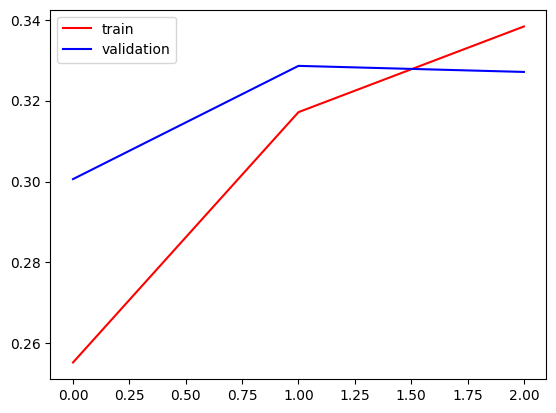

In [16]:
history = resnet_model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

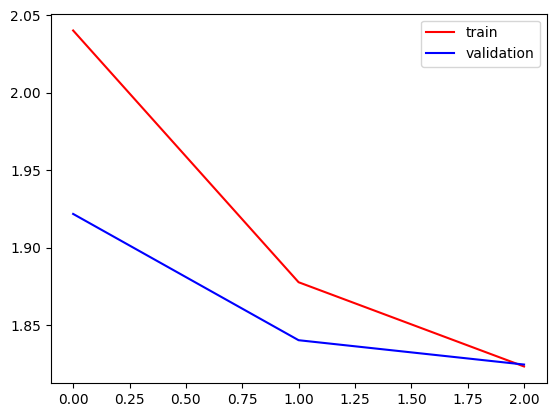

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_dir = '/content/drive/MyDrive/Colab Notebooks/test'


test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


results = resnet_model.evaluate(test_data)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Found 740 images belonging to 2 classes.
24/24 [==============================] - 246s 10s/step - loss: 11.4607 - accuracy: 0.0000e+00
Test Loss: 11.460677146911621
Test Accuracy: 0.0


In [24]:
predictions = resnet_model.predict(test_data)
print(predictions)

24/24 [==============================] - 223s 9s/step
[[3.6725204e-04 1.4737445e-07 1.0238902e-02 ... 9.4133961e-01
  1.2326984e-06 3.2384955e-06]
 [6.0196413e-04 4.2910636e-07 1.2725674e-02 ... 9.2899472e-01
  2.8800723e-06 7.5679545e-06]
 [1.1761746e-03 2.0185209e-06 2.0201854e-02 ... 8.8487029e-01
  7.8733328e-06 2.6549373e-05]
 ...
 [3.7300328e-04 6.5099715e-07 9.9475700e-03 ... 9.4229323e-01
  1.6961210e-06 1.1659621e-05]
 [2.7079092e-04 3.9544221e-07 8.7165935e-03 ... 9.5033813e-01
  9.5917824e-07 7.0410979e-06]
 [2.6820198e-04 3.0812899e-07 9.3881916e-03 ... 9.4883454e-01
  9.5254626e-07 5.9634949e-06]]


In [25]:
len(predictions)

740

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


test_data.reset()
predictions = resnet_model.predict(test_data)


print(f"Predictions shape: {predictions.shape}")
print(f"Number of samples in test data: {test_data.samples}")


predicted_labels = (predictions > 0.5).astype(int).flatten()


true_labels = test_data.classes


print(f"True labels length: {len(true_labels)}")
print(f"Predicted labels length: {len(predicted_labels)}")


if len(predicted_labels) != len(true_labels):
    predicted_labels = predicted_labels[:len(true_labels)]


cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


24/24 [==============================] - 220s 9s/step
Predictions shape: (740, 10)
Number of samples in test data: 740
True labels length: 740
Predicted labels length: 7400
Confusion Matrix:
[[275  30]
 [391  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.90      0.57       305
           1       0.59      0.10      0.17       435

    accuracy                           0.43       740
   macro avg       0.50      0.50      0.37       740
weighted avg       0.52      0.43      0.34       740

